# Titanic Survival Prediction using KNN & Decision Tree

This project focuses on predicting survival of Titanic passengers using two classic machine learning models:

- **K-Nearest Neighbors (KNN)**
- **Decision Tree Classifier**

We used the famous Titanic dataset from Kaggle, cleaned and preprocessed it, then trained and evaluated both models. Finally, we compared their performance to find the better classifier for this dataset.



In [9]:
%pip install Pandas
%pip install seaborn matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nNull Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
df.head()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Dataset Shape: (891, 12)

Column Names:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Null Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning & Preprocessing

- Dropped irrelevant columns: `PassengerId`, `Name`, `Cabin`, `Ticket`
- Filled missing values in `Age` using **median**, and `Embarked` using **mode**
- Converted categorical columns:
  - `Sex`: male → 0, female → 1
  - `Embarked`: S → 0, C → 1, Q → 2
- Verified all columns are now numeric
- Dataset is now fully clean and ready for modeling


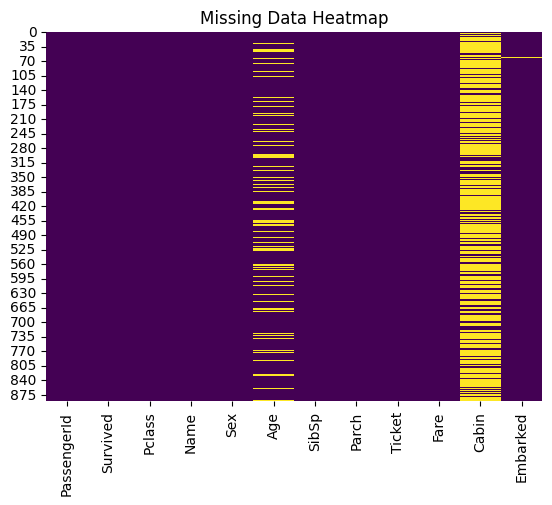

In [10]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df.drop('Cabin', axis=1, inplace=True)

df.drop(['Ticket', 'Name'], axis=1, inplace=True)


C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_11336\1081425802.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\DANISH LAPTOP\AppData\Local\Temp\ipykernel_11336\1081425802.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

## Exploratory Data Analysis

Key patterns found in the Titanic dataset:

- **Sex** had the strongest correlation with survival — females had higher survival chances
- **Fare** and **Pclass** showed clear influence: higher fare or better class → higher survival rate
- Countplots, correlation matrix, and feature visualizations confirmed these trends


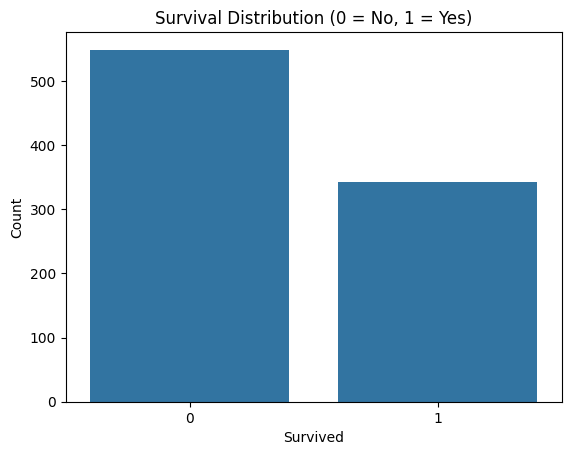

In [12]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

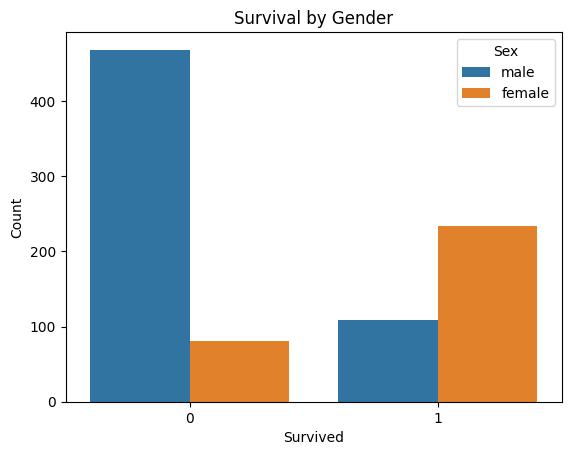

In [13]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

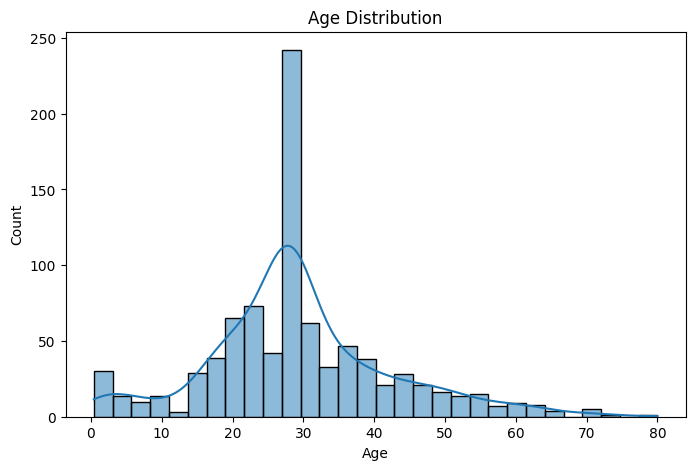

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

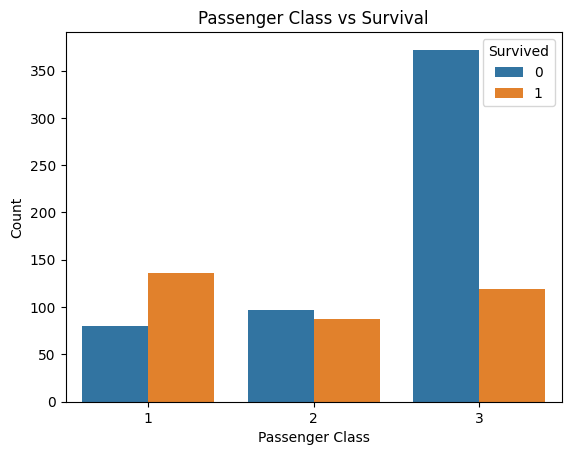

In [15]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Passenger Class vs Survival")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

In [16]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [17]:
print("\nCleaned Dataset Info:")
print(df.info())
print("\nSample:\n", df.head())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB
None

Sample:
    PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    0  22.0      1      0   7.2500         0
1            2         1       1    1  38.0      1      0  71.2833         1
2            3         1       3    1  26.0      0      0   7.9250         0
3            4         1       1    1

##  Model Training & Evaluation

### 1. K-Nearest Neighbors (KNN)

- Initial accuracy (default k=5): **65.92%**
- After removing `PassengerId` and scaling features → accuracy jumped to **82.12%**
- Best accuracy achieved at `k = 7`

### 2. Decision Tree Classifier

- Achieved accuracy: **74.30%**
- Top features: `Sex`, `Fare`, `Pclass`
- Easy to interpret, but prone to overfitting

### Comparison

| Model       | Accuracy |
|-------------|----------|
| KNN (k=5)   | 65.92%   |
| Decision Tree | 74.30% |
| **KNN (k=7)** | **82.12%**  Best |


In [18]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
%pip install scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)


In [21]:
knn_accuracy = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%\n")

print("Classification Report:\n", classification_report(y_test, knn_preds))

KNN Accuracy: 65.92%

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74       105
           1       0.64      0.41      0.50        74

    accuracy                           0.66       179
   macro avg       0.65      0.62      0.62       179
weighted avg       0.65      0.66      0.64       179



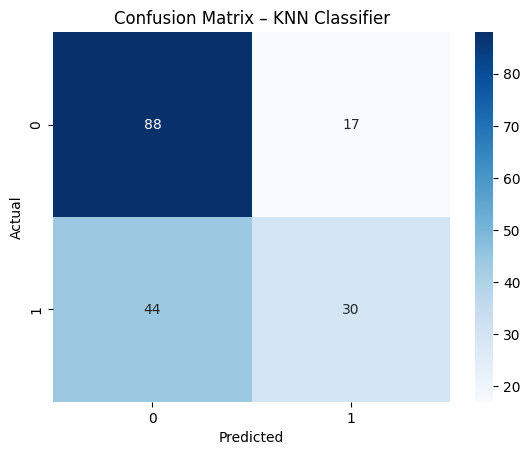

In [ ]:

sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – KNN Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

dtree_preds = dtree.predict(X_test)


In [ ]:
dtree_accuracy = accuracy_score(y_test, dtree_preds)
print(f"Decision Tree Accuracy: {dtree_accuracy * 100:.2f}%\n")

print("Classification Report:\n", classification_report(y_test, dtree_preds))


Decision Tree Accuracy: 74.30%

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.69      0.69      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



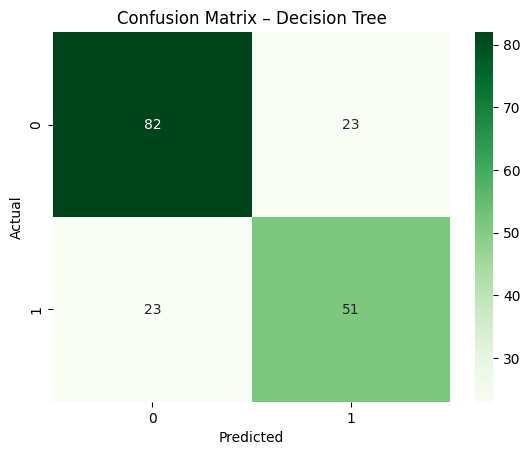

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, dtree_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


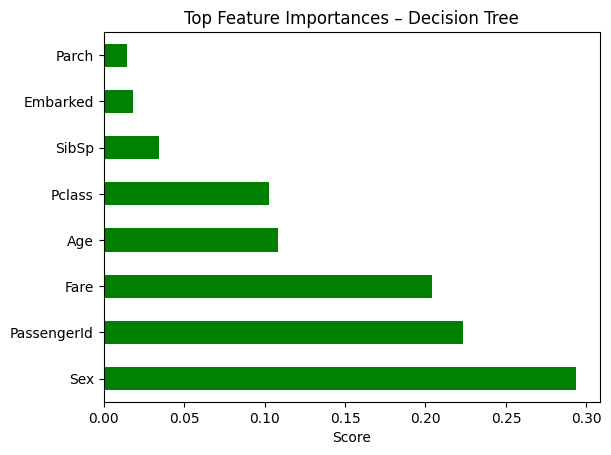

In [ ]:
feat_importances = pd.Series(dtree.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Top Feature Importances – Decision Tree")
plt.xlabel("Score")
plt.show()


In [27]:
X = df.drop(["Survived", "PassengerId"], axis=1)
y = df["Survived"]


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Accuracy vs. k (KNN)

We tuned the `k` value from 1 to 20 and found:

- Best accuracy at `k = 7`: **82.12%**
- Scaling features was essential to achieving this performance
- The graph shows how model accuracy changes with different values of k


In [ ]:
accuracies = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc*100:.2f}%")


k=1, Accuracy=77.65%
k=2, Accuracy=80.45%
k=3, Accuracy=79.89%
k=4, Accuracy=79.33%
k=5, Accuracy=80.45%
k=6, Accuracy=79.89%
k=7, Accuracy=82.12%
k=8, Accuracy=81.01%
k=9, Accuracy=80.45%
k=10, Accuracy=79.33%
k=11, Accuracy=80.45%
k=12, Accuracy=80.45%
k=13, Accuracy=80.45%
k=14, Accuracy=80.45%
k=15, Accuracy=81.56%
k=16, Accuracy=81.01%
k=17, Accuracy=81.56%
k=18, Accuracy=81.01%
k=19, Accuracy=81.01%
k=20, Accuracy=81.01%


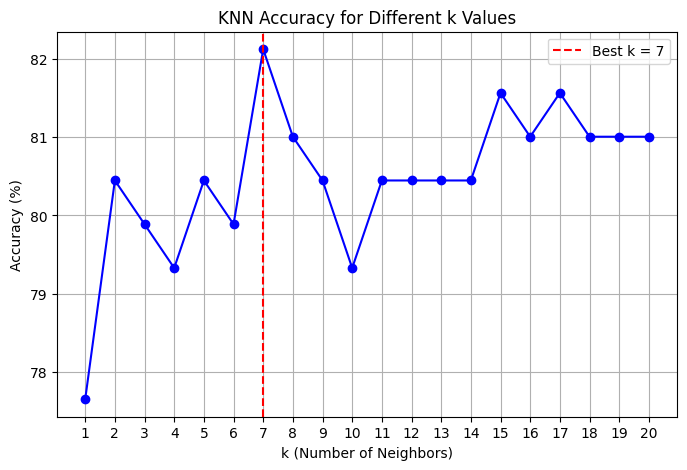

In [30]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 21), [a * 100 for a in accuracies], marker='o', color='blue')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.xticks(range(1, 21))
plt.grid(True)
plt.axvline(7, color='red', linestyle='--', label='Best k = 7')
plt.legend()
plt.show()


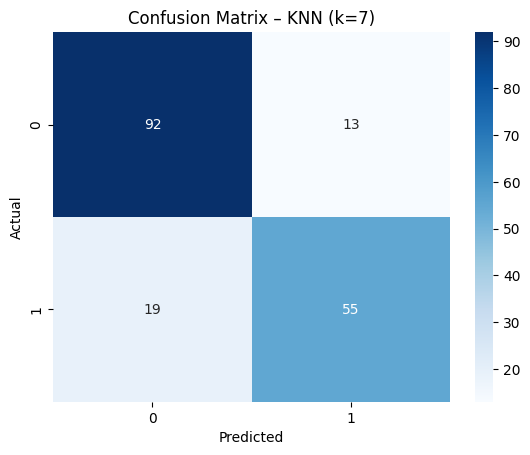

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=7)
knn_best.fit(X_train, y_train)
best_preds = knn_best.predict(X_test)

sns.heatmap(confusion_matrix(y_test, best_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – KNN (k=7)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##  Final Conclusion

In this project, we compared two supervised classification models — KNN and Decision Tree — on the Titanic dataset.

The initial KNN model underperformed due to:
- Lack of feature scaling
- Inclusion of irrelevant columns

However, after tuning and proper preprocessing, **KNN with `k = 7` and scaled features achieved 82% accuracy**, outperforming the Decision Tree (74.30%).

The most important features for prediction were:
- `Sex`: women had significantly higher survival chances
- `Fare`: passengers who paid more were more likely in first class
- `Pclass`: lower class passengers had lower survival rate

This project highlights the **importance of preprocessing, feature selection, and hyperparameter tuning**.

> **KNN is a strong performer when handled properly.**

##  Learnings & Future Suggestions

- Feature scaling and cleaning have a huge impact on model performance
- Tree-based models provide great interpretability but can overfit
- Distance-based models like KNN require scaling and tuning for best performance

###  Future Work Ideas:
- Try **ensemble models** like VotingClassifier or Random Forest
- Use **cross-validation** for better generalization
- Plot decision boundaries using dimensionality reduction
- Submit to **Kaggle** as part of your profile

---
**Developed by Azib Malick**  

© 2025 Azib Malick. All rights reserved.

